In [3]:
import pyvista as pv
import numpy as np



In [4]:
import sys
sys.path.insert(0, '..')

In [5]:
from vtk_smoldyn.generate_data import generate_molecule_coordinates

In [6]:
model_fp = 'models/minE_Andrews_052023/model.txt'
mol_data = np.array(generate_molecule_coordinates(model_fp, 2))

Libsmoldyn notification from smolRunSim: Simulation complete


In [7]:
# create plotter 

p = pv.Plotter(shape=(1, 5))

In [8]:
parameter_vals = np.arange(-1.0, 1.5, 0.5)

In [9]:
for val in parameter_vals:
    spline = pv.KochanekSpline(
        mol_data[:6],
        continuity=[val, val, val],
    )
    p.add_text("c = " + str(val))
    p.add_mesh(spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:6]),
        color="k",
        point_size=10,
        render_points_as_spheres=True
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


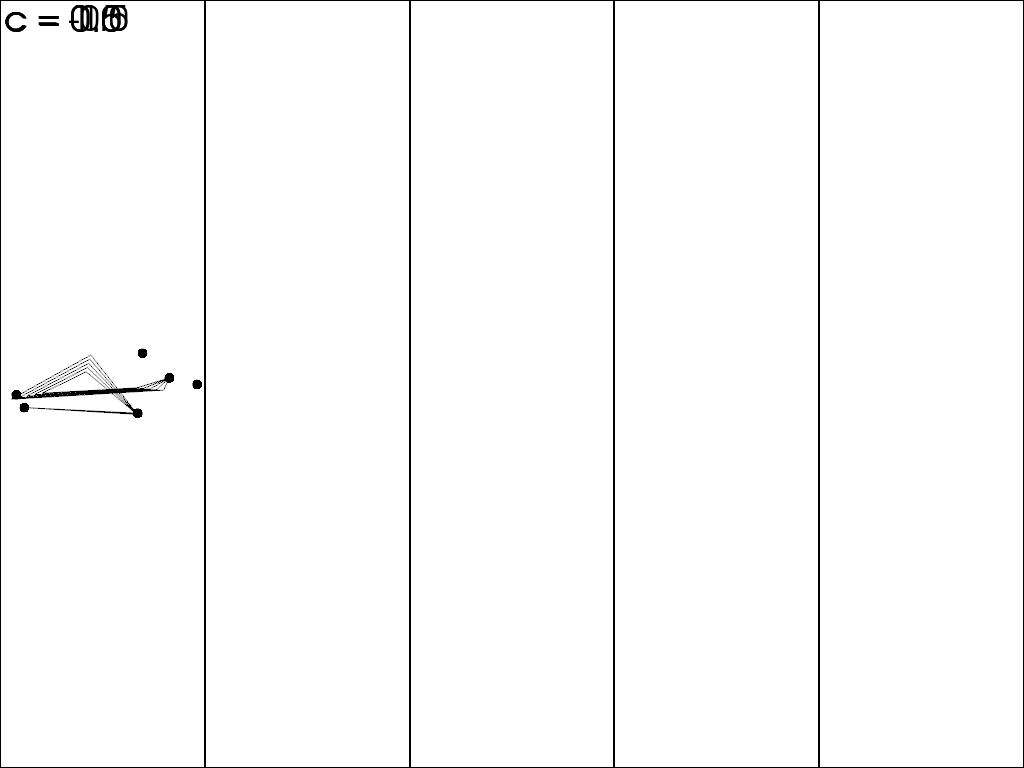

In [10]:
p.show(cpos="xy")

In [11]:
def make_points():
    """Helper to make XYZ points"""
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 6)
    z = np.linspace(-2, 2, 6)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y, z))


points = make_points()

In [12]:
points

array([[ 2.44929360e-15,  5.00000000e+00, -2.00000000e+00],
       [-2.32057790e+00,  7.54001466e-01, -1.20000000e+00],
       [-6.81830893e-01, -9.38459713e-01, -4.00000000e-01],
       [ 6.81830893e-01, -9.38459713e-01,  4.00000000e-01],
       [ 2.32057790e+00,  7.54001466e-01,  1.20000000e+00],
       [-2.44929360e-15,  5.00000000e+00,  2.00000000e+00]])

In [13]:
mol_data

array([[ 1.25018248,  0.09340846, -0.49119737],
       [ 1.65876787, -0.01451408,  0.47390094],
       [-1.32922979, -0.18900231, -0.46290186],
       ...,
       [ 0.14728672, -0.30509238,  0.39612958],
       [ 0.51261817, -0.36674853, -0.33984631],
       [ 0.1381137 ,  0.20106383, -0.45779181]])

In [14]:
p = pv.Plotter(shape=(3, 5))

c = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], continuity=[c[i], c[i], c[i]], n_points=1000)
    p.subplot(0, i)
    p.add_text("c = " + str(c[i]))
    p.add_mesh(kochanek_spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [15]:
t = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:5], tension=[t[i], t[i], t[i]], n_points=1000)
    p.subplot(1, i)
    p.add_text("t = " + str(t[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [16]:
b = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], bias=[b[i], b[i], b[i]], n_points=1000)
    p.subplot(2, i)
    p.add_text("b = " + str(b[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


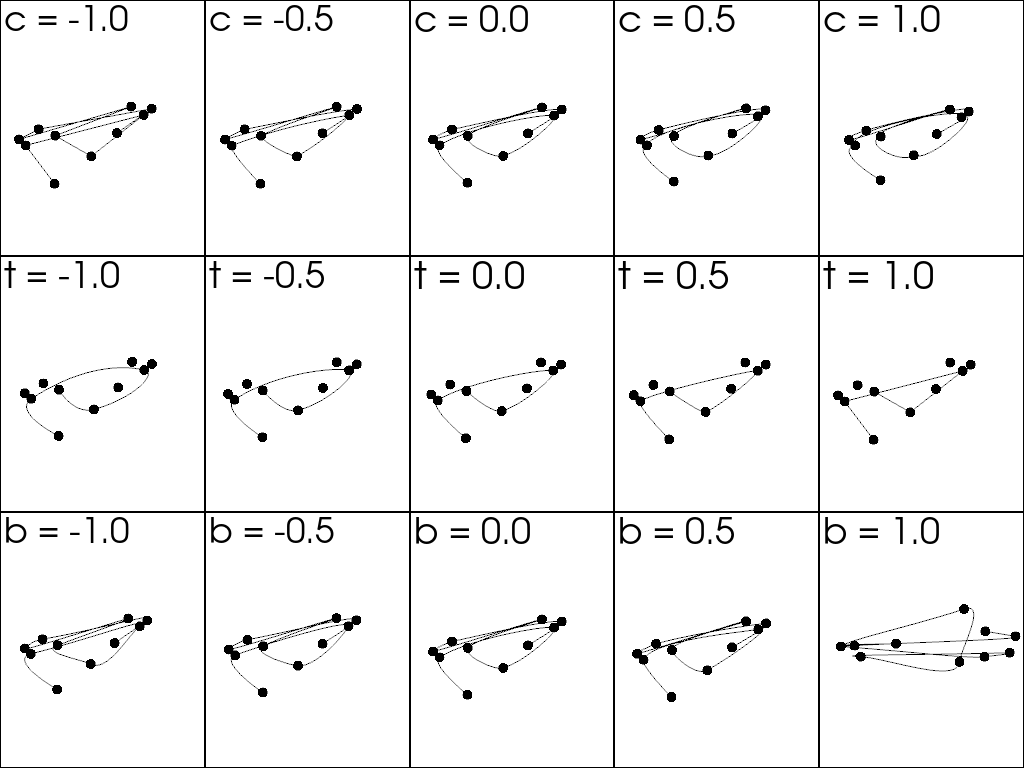

In [17]:
p.show(cpos="xy")

In [18]:
point_cloud = pv.PolyData(mol_data)

In [19]:
point_cloud

PolyData,Information
N Cells,4044861
N Points,4044861
N Strips,0
X Bounds,"-2.000e+00, 2.000e+00"
Y Bounds,"-5.000e-01, 5.000e-01"
Z Bounds,"-5.000e-01, 5.000e-01"
N Arrays,0


In [20]:
np.allclose(mol_data, point_cloud.points)

True

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


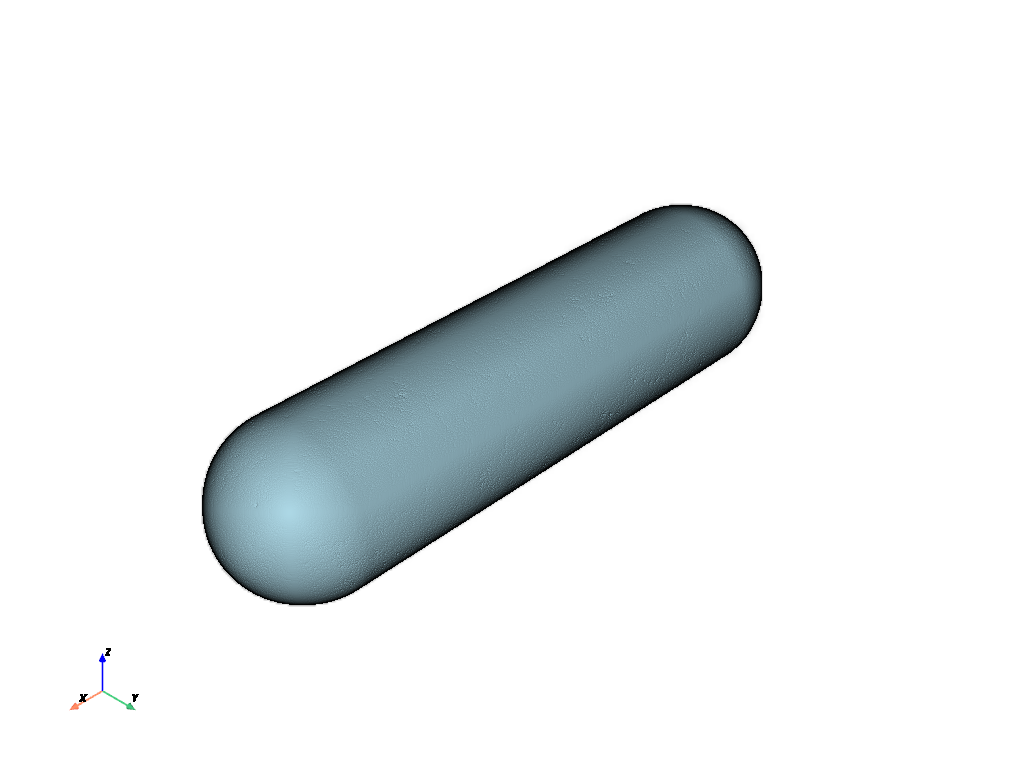

In [21]:
point_cloud.plot(eye_dome_lighting=True)

In [22]:
crowding_model_fp = 'models/crowding4/model.txt'

crowding_mols = generate_molecule_coordinates(crowding_model_fp, 2)

--------------------------------------------------------------
Running Smoldyn 2.72

CONFIGURATION FILE
 Path: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/'
 Name: 'model.txt'
 Reading file: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/model.txt'
 Loaded file successfully
 setting up molecules
 setting up virtual boxes
 setting up compartments
 setting up reactions
 setting up surfaces
 setting up graphics

SIMULATION PARAMETERS
 file: /Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/model.txt
 starting clock time: Mon Dec 18 18:51:11 2023
 3 dimensions
 Accuracy level: 5
 Random number seed: 1
 Time from 0 to 500 step 0.002

GRAPHICS PARAMETERS
 No graphical output

WALL PARAMETERS
 wall 0: dimension x, at -2
 wall 1: dimension x, at 2
 wall 2: dimension y, at -0.5
 wall 3: dimension y, at 0.5
 wall 4: dimension z, at -0.5
 wall 5: dimension

Libsmoldyn notification from smolRunSim: Simulation complete


In [23]:
crowding_point_cloud = pv.PolyData(crowding_mols)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


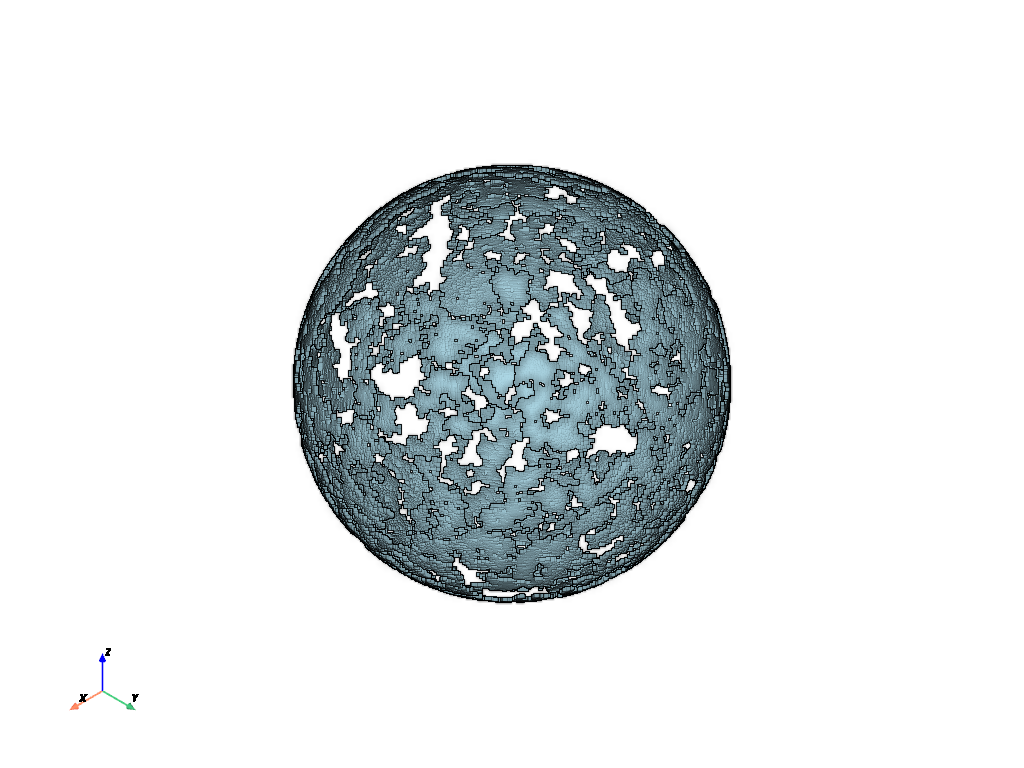

In [24]:
crowding_point_cloud.plot(eye_dome_lighting=True)

In [25]:
z_coords = []
for mol in crowding_mols:
    z_coords.append(mol[-1])
    

In [26]:
def get_axis(agent_coordinates: list[list[float]], axis: int):
    """Return a 1d list of scalar `axis` values from the given `agent_coordinates`.
    
        Args:
            agent_coordinates:`str`: A list of lists where each inner list consists of [x, y, z]. 
            axis:`int`: the index of the desired axis given the syntax x, y, z. Pass `0` for x, 
            `1` for y, and `2` for z. 
            
        Returns:
            A 1d list of axis scalars
    """
    return [agent_coord[axis] for agent_coord in agent_coordinates]

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


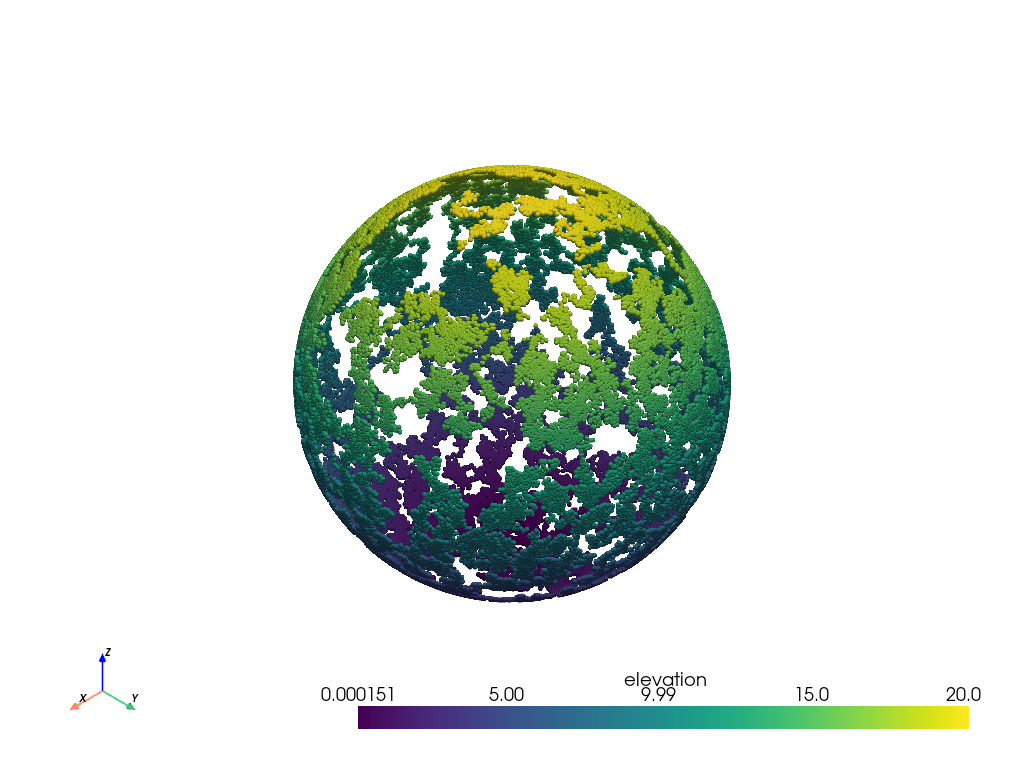

In [27]:
crowding_point_cloud["elevation"] = z_coords
crowding_point_cloud.plot(render_points_as_spheres=True)

In [28]:
def compute_vectors(mesh: pv.PolyData) -> pv.pyvista_ndarray:
    origin = mesh.center 
    vectors = mesh.points - origin 
    vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    return vectors

In [29]:
crowding_vectors = compute_vectors(crowding_point_cloud)

In [30]:
crowding_vectors

pyvista_ndarray([[-0.9309173 , -0.02305944,  0.36450136],
                 [-0.33961124,  0.12776967, -0.93184715],
                 [ 0.49180199,  0.65168088, -0.5774451 ],
                 ...,
                 [ 0.64945003, -0.73331012, -0.20117387],
                 [ 0.79967903, -0.32770804, -0.50311122],
                 [ 0.73324394, -0.35285258, -0.58124726]])

In [31]:
crowding_point_cloud['vectors'] = crowding_vectors 

arrows = crowding_point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.15
)

In [32]:
plotter = pv.Plotter()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


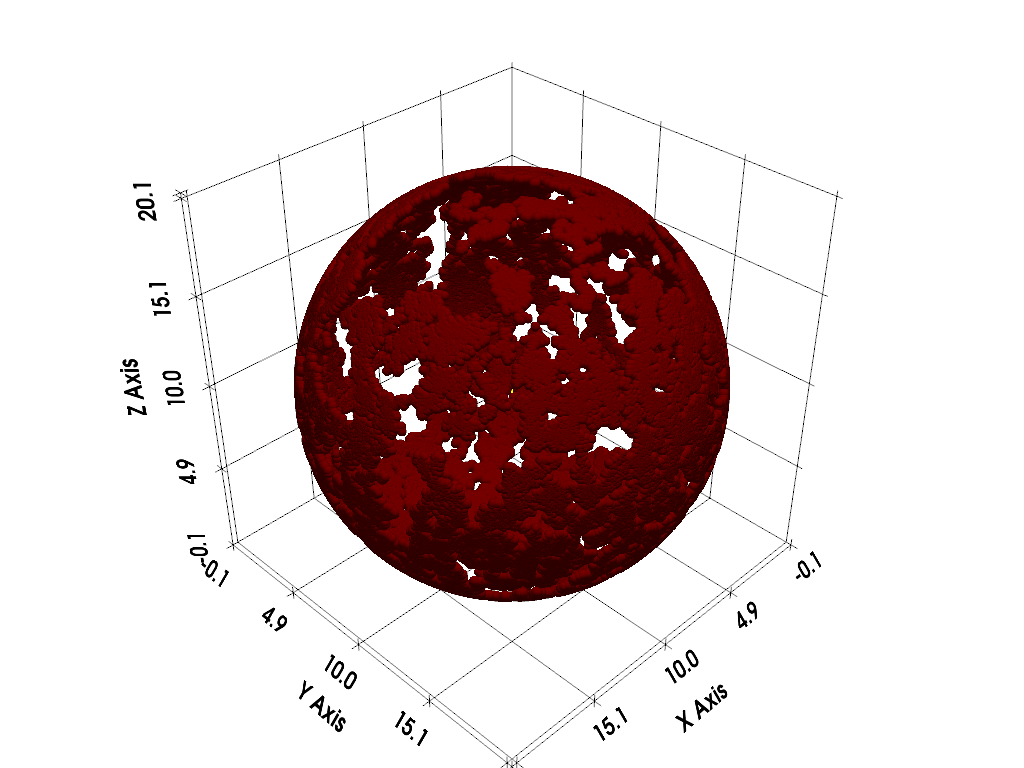

In [33]:
plotter.add_mesh(crowding_point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                          point_color='yellow', point_size=20)

plotter.show_grid()
plotter.show()

In [34]:
minE_vectors = compute_vectors(point_cloud)

In [35]:
minE_z_coords = get_axis(mol_data, 2)

In [36]:
point_cloud['elevation'] = minE_z_coords

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


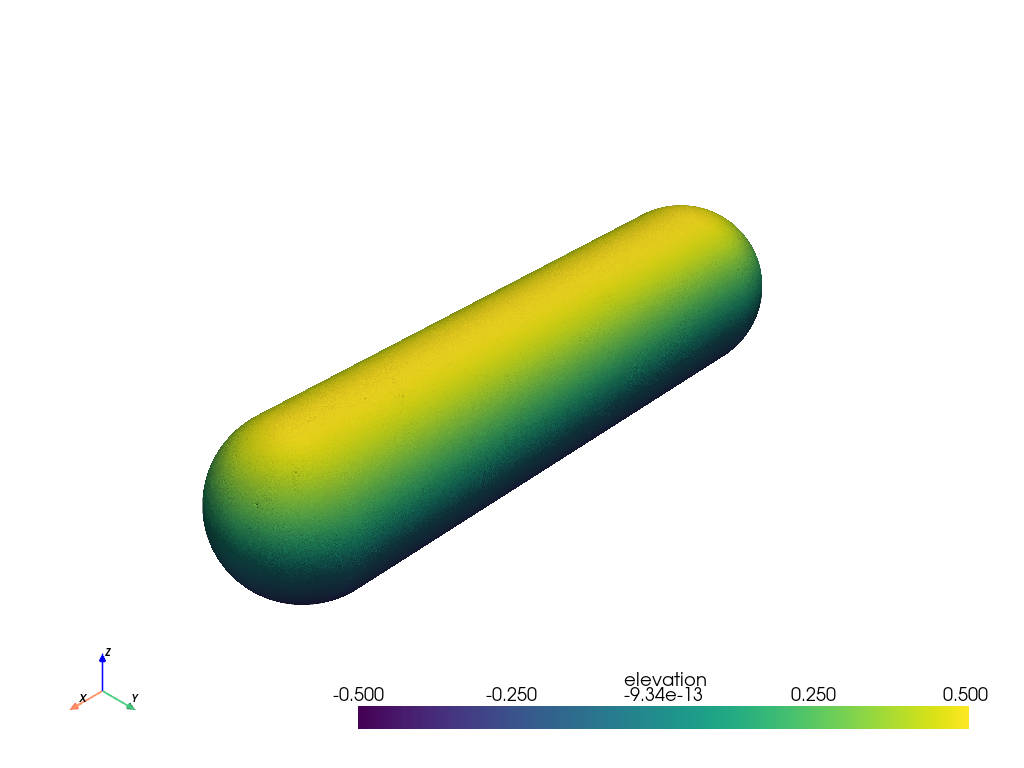

In [37]:
point_cloud.plot(render_points_as_spheres=True)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


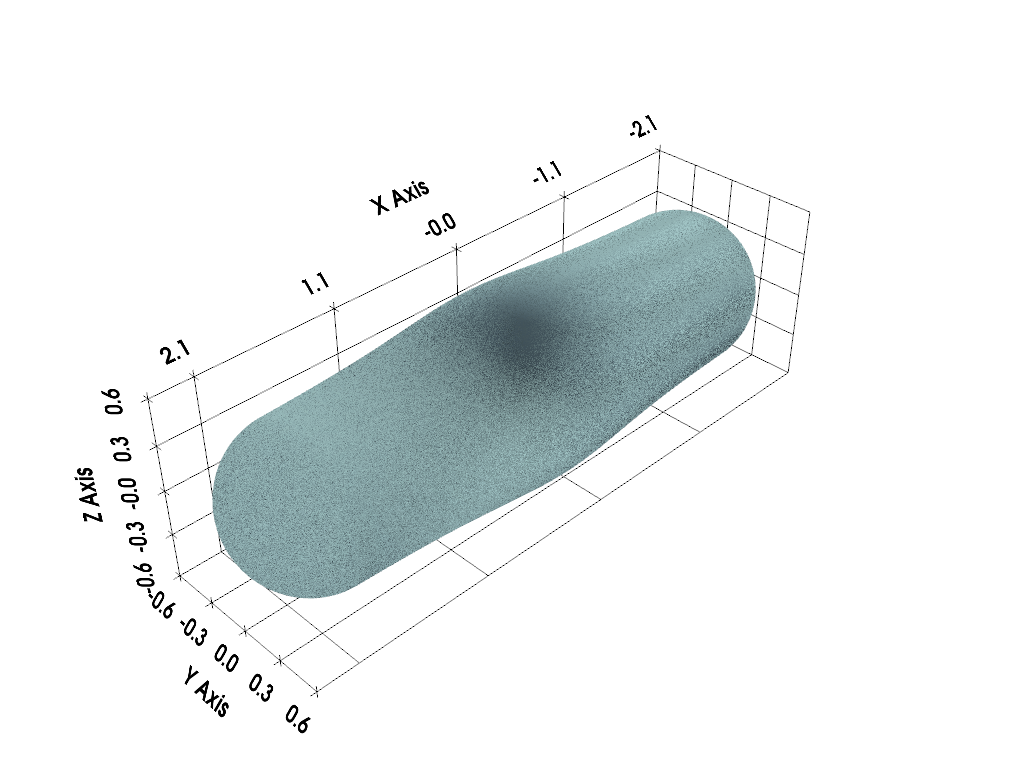

In [38]:
point_cloud['vectors'] = minE_vectors

arrows = point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.15,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                        point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


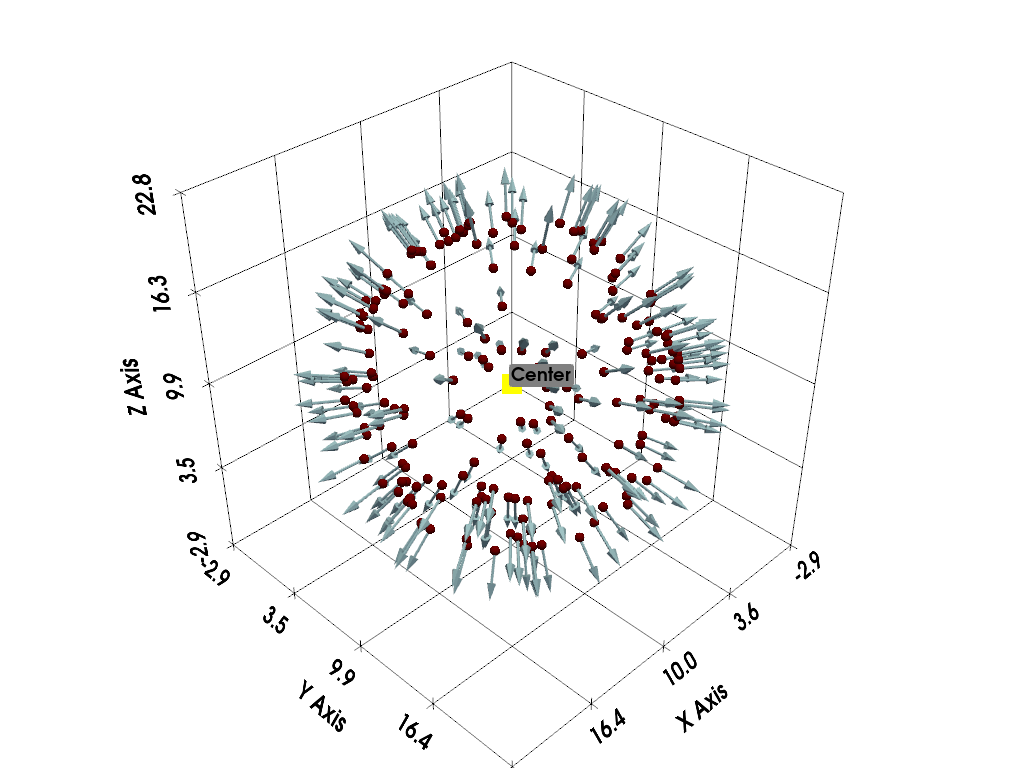

In [39]:
# Create random XYZ points
points = crowding_mols[:200]
# Make PolyData
point_cloud = pv.PolyData(points)

vectors = compute_vectors(point_cloud)
point_cloud['vectors'] = vectors



arrows = point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=3.0,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [40]:
def slice_data(data: list[list[float]], **dims):
    """Slice a 2d array of data given input dimensions.
        
        Args:
            data:`List[List[float]]`: a 2d array of agent coordinate data. For example: [[x0,y0,z0], [x1,y1,z1], ...]
            dims:`kwargs`: keyword arguments are: xstart, xstop, ystart, ystop
    """
    return data[dims['xstart']:dims['xstop'], dims['ystart']:dims['ystop']]

In [41]:
sliced = mol_data[:200]

In [42]:
sliced_cloud = pv.PolyData(sliced)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


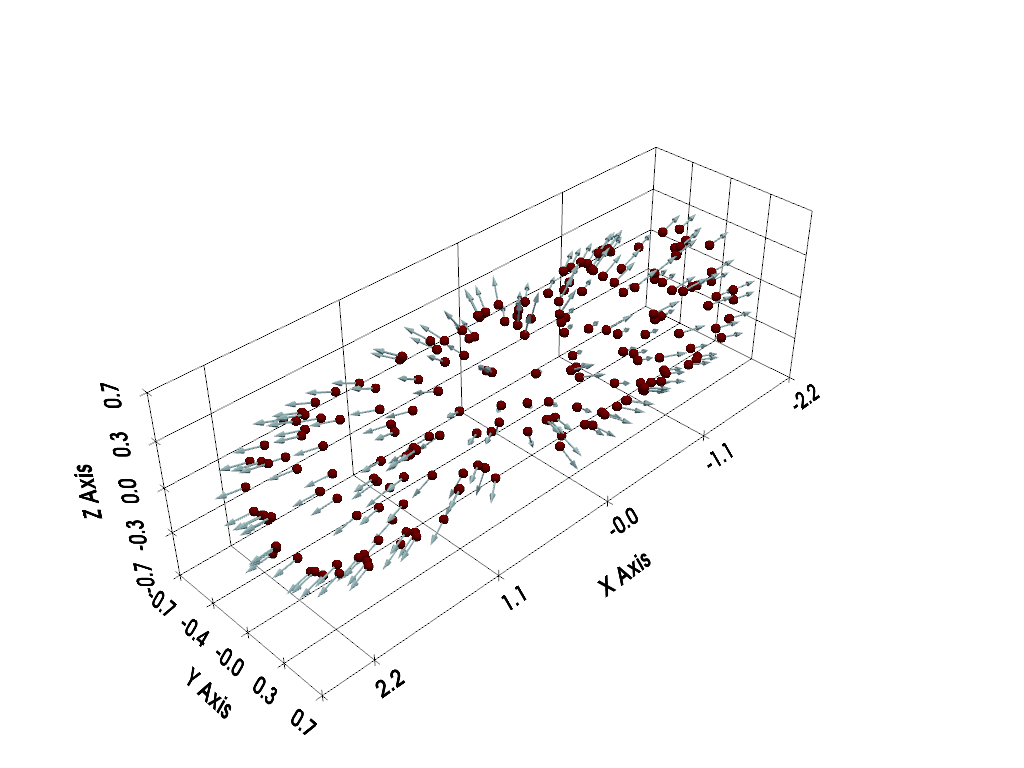

In [43]:
sliced_vectors = compute_vectors(sliced_cloud)

sliced_cloud['vectors'] = sliced_vectors

arrows = sliced_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.20,
)


# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(sliced_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
# plotter.add_point_labels([point_cloud.center,], ['Center',],
#                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [44]:
crowding_pointset = pv.PointSet(var_inp=crowding_mols)

In [45]:
crowding_pointset.surface_indices

<bound method DataSetFilters.surface_indices of PointSet (0x2e057dd20)
  N Cells:    0
  N Points:   102255
  X Bounds:   1.228e-04, 2.000e+01
  Y Bounds:   1.703e-03, 2.000e+01
  Z Bounds:   1.509e-04, 1.998e+01
  N Arrays:   0>

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


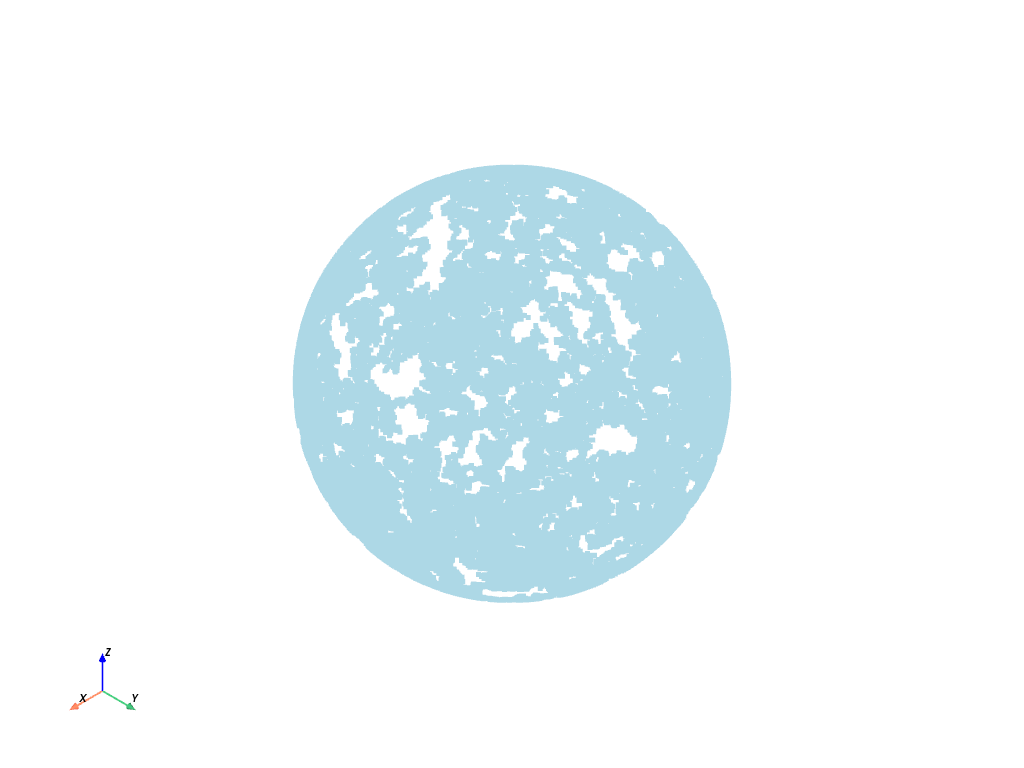

In [46]:
crowding_pointset.plot()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


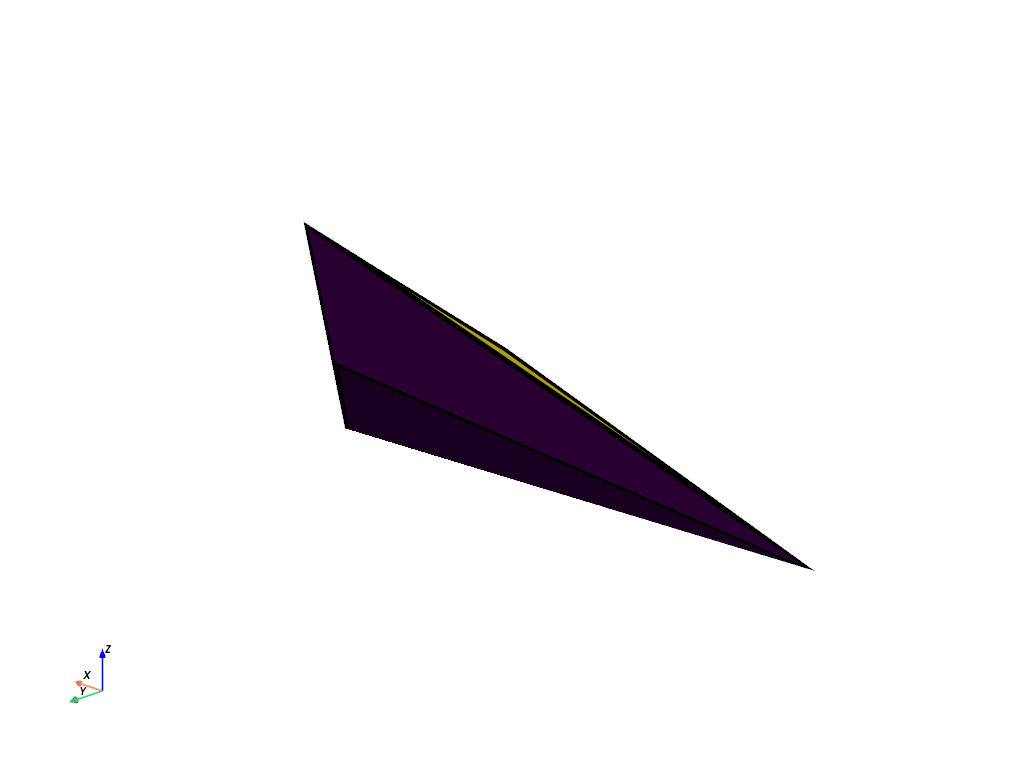

In [47]:
vertices = mol_data
# mesh faces
faces = np.hstack(
    [
        [4, 0, 1, 2, 3],  # square
        [3, 0, 1, 4],  # triangle
        [3, 1, 2, 4],  # triangle
    ]
)

surf = pv.PolyData(vertices, faces)

# plot each face with a different color
surf.plot(
    scalars=np.arange(3),
    cpos=[-1, 1, 0.5],
    show_scalar_bar=False,
    show_edges=True,
    line_width=5,
)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


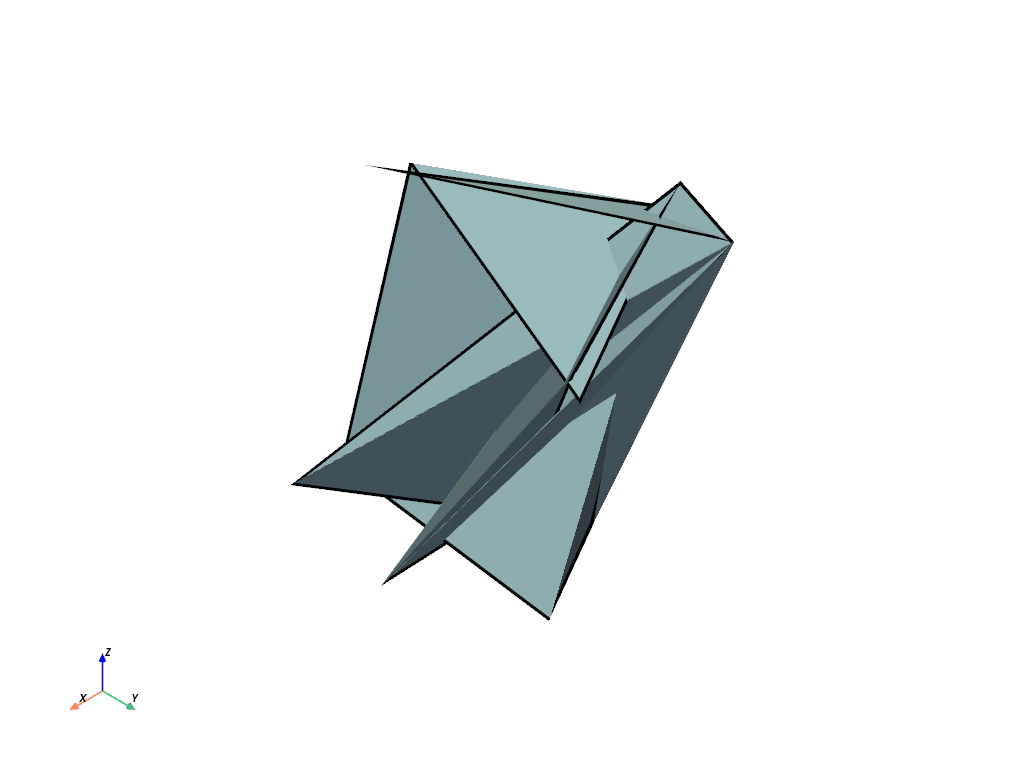

In [48]:
points = crowding_mols

face_a = [6, 0, 1, 2, 3, 4, 5]
face_b = [6, 6, 7, 8, 1, 0, 9]
face_c = [6, 10, 11, 12, 7, 6, 13]
faces = np.concatenate((face_a, face_b, face_c))

mesh = pv.PolyData(points, faces)
mesh.plot(show_edges=True, line_width=5)

In [54]:
mesh = pv.PointSet(var_inp=mol_data[:100]).threshold(145, scalars="scalars")
mask = mesh['scalars'] < 210
mesh['scalars'][mask] = 0  # null out smaller vectors

# Make a geometric object to use as the glyph
geom = pv.Arrow()  # This could be any dataset

# Perform the glyph
glyphs = mesh.glyph(orient="vectors", scale="scalars", factor=0.003, geom=geom)

# plot using the plotting class
pl = pv.Plotter()
pl.add_mesh(glyphs, show_scalar_bar=False, lighting=False, cmap='coolwarm')
pl.camera_position = [
    (146.53, 91.28, 21.70),
    (125.00, 94.45, 19.81),
    (-0.086, 0.007, 0.996),
]  # view only part of the vector field
cpos = pl.show(return_cpos=True)

ValueError: No arrays present to threshold.

In [57]:
mesh = pv.PointSet(var_inp=mol_data[:100])
# create a subset of arrows using the glyph filter
arrows = mesh.glyph( tolerance=0.05)

p = pv.Plotter()
p.add_mesh(arrows, color="black")
p.add_mesh(mesh, scalars="Elevation", cmap="terrain", smooth_shading=True)
p.show()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/core/filters/data_set.py:2293: UserWarning: No data to use for scale. scale will be set to False.
  warnings.warn("No data to use for scale. scale will be set to False.")
/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/core/filters/data_set.py:2320: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


KeyError: 'Data array (Elevation) not present in this dataset.'

In [53]:
mesh

[1.250182484684089,
 1.6587678679867572,
 -1.329229791841756,
 0.7826590706321082,
 0.7083045912925864,
 -1.1841608247915658,
 1.5713027931217343,
 1.1255335241149957,
 -1.5949807345389808,
 -0.5118981744190442,
 -0.010082973751724499,
 1.8535042840180693,
 1.458476470773685,
 0.21640503749167658,
 -0.1434622536514565,
 0.11921042241603377,
 -1.4422020788635597,
 -1.8714817838909759,
 -1.3194750062701002,
 0.3595762222212684,
 1.835247179687779,
 -0.10910494569901034,
 1.5891598888181988,
 1.0885043329532502,
 0.578684746538914,
 -1.8270058410305074,
 -0.9161160081662507,
 -0.08512528254304204,
 1.7594366871657399,
 0.6212132443024809,
 -0.3695140776386284,
 -0.18979397921119678,
 -0.6041420400385145,
 -1.562333264751903,
 -0.5503165570670544,
 1.364115081463036,
 0.6131482364407621,
 1.2843328134120287,
 1.9826321073301676,
 0.5844630769184936,
 -1.2740314963213242,
 1.916992350229293,
 -0.1316386963314467,
 -1.3781018920424633,
 0.5997717387740901,
 -1.412813766373511,
 1.98838984314